# Практическая работа №3 - BODMAS

**Выполнили**
- Картунчиков А.М. 
- Агасиев М.А. 
- Искяндяров И.Т.

**Группа ББМО-01-23**

Импортируем необходимые библиотеки

In [53]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
import os
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.linear_model import LogisticRegression

from pycaret.regression import *
from pycaret.datasets import get_data
from pycaret.classification import *

from sklearn.feature_selection import VarianceThreshold

from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

Загрузим данные в датафрейм

In [2]:
filename = 'bodmas.npz'
data = np.load(filename)
X = data['X']  # all the feature vectors
y = data['y']  # labels, 0 as benign, 1 as malicious

df = pd.DataFrame(X)
df['label'] = y

Посмотрим что из себя представляет получившийся датафрейм

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,...,2372,2373,2374,2375,2376,2377,2378,2379,2380,label
0,0.056742,0.008017,0.007762,0.005466,0.007762,0.004446,0.005430,0.003061,0.009475,0.006305,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.007062,0.004500,0.004498,0.004318,0.004410,0.004330,0.004265,0.004068,0.004391,0.004306,...,0.0,0.0,0.0,120.0,16564.0,0.0,0.0,0.0,0.0,0
2,0.020975,0.004699,0.004002,0.004419,0.004214,0.003865,0.003973,0.004297,0.003921,0.004145,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.006482,0.003821,0.003788,0.003866,0.003734,0.003784,0.003884,0.003937,0.003805,0.003809,...,0.0,0.0,0.0,140.0,16384.0,0.0,0.0,0.0,0.0,0
4,0.022135,0.003972,0.003834,0.003869,0.003759,0.003765,0.003777,0.003863,0.003773,0.003798,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134430,0.065420,0.005993,0.005216,0.005492,0.005747,0.004183,0.005373,0.004388,0.005619,0.004121,...,1160180.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
134431,0.065421,0.005993,0.005216,0.005492,0.005747,0.004183,0.005373,0.004388,0.005617,0.004121,...,1160180.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
134432,0.142307,0.016379,0.010974,0.005991,0.009369,0.005670,0.003335,0.003099,0.009761,0.002385,...,674640.0,0.0,0.0,2180.0,585728.0,0.0,0.0,0.0,0.0,1
134433,0.142308,0.016379,0.010974,0.005991,0.009369,0.005670,0.003335,0.003099,0.009761,0.002386,...,674640.0,0.0,0.0,2180.0,585728.0,0.0,0.0,0.0,0.0,1


Видим что общее колличество имеющихся сэмплов **134435**, колличество признаков **2380**

Посмотрим сколько из них вредоносные (1), а сколько невредоносные (0)


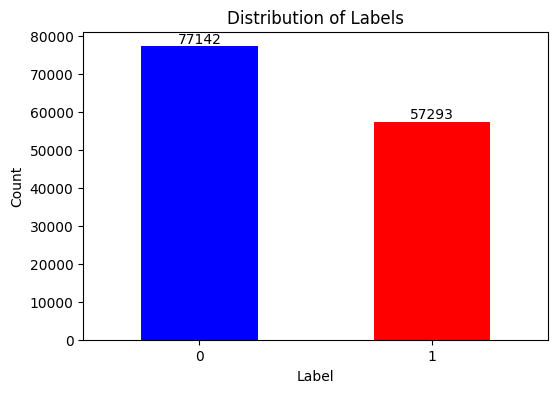

In [4]:
label_counts = df['label'].value_counts()

plt.figure(figsize=(6, 4))
bars = label_counts.plot(kind='bar', color=['blue', 'red'])
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)

for index, value in enumerate(label_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

Видим что у нас имеется **77142** невредоносных образца и **57293** вредоносных образца

Выберем 100 лучших признаков для дальнейшего обучения с помощью Univariate feature selection

In [27]:
X_new = SelectKBest(f_classif, k=100).fit_transform(X, y)
X_new.shape

(134435, 100)

In [31]:
df_selected = pd.DataFrame(X_new)
df_selected['label'] = y
df_selected

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,label
0,0.007762,0.002296,0.001859,0.002223,0.002150,0.005576,0.004227,0.002770,0.002843,0.002915,0.005066,0.000000,0.000000,0.000000,0.000000,0.000000,0.012821,0.010684,0.008547,0.009615,0.004274,0.019231,0.016026,0.006410,0.0,0.0,1.0,0.0,0.000000e+00,1.0,0.0,0.0,-1.0,0.0,-1.0,-1.0,0.0,0.0,-1.0,0.0,0.0,-1.0,0.0,0.0,0.0,4.0,4.0,3.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,-3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.004498,0.003968,0.003876,0.003683,0.003895,0.004143,0.004020,0.003882,0.003572,0.003669,0.003852,0.000000,0.000000,0.000315,0.000000,0.000000,0.010157,0.010266,0.010813,0.011049,0.010449,0.010740,0.009520,0.010084,0.0,1.0,1.0,0.0,9.392060e+08,1.0,0.0,0.0,-1.0,1.0,-1.0,-1.0,0.0,0.0,-1.0,0.0,0.0,-1.0,0.0,3.0,0.0,4.0,4.0,3.0,-4.891051,0.000000,-6.285849,-1.0,1.0,0.0,0.0,0.0,-2.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
2,0.004002,0.003716,0.003783,0.003859,0.003817,0.003976,0.003879,0.003778,0.003820,0.003973,0.004294,0.000005,0.000004,0.000890,0.000050,0.000069,0.011007,0.008612,0.009524,0.009011,0.010152,0.010152,0.010380,0.009011,0.0,1.0,1.0,0.0,7.089925e+08,1.0,0.0,0.0,-1.0,2.0,-1.0,-1.0,0.0,0.0,-1.0,0.0,0.0,-1.0,0.0,2.0,25.0,4.0,4.0,10.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
3,0.003788,0.003823,0.003864,0.003912,0.003891,0.003801,0.003867,0.003927,0.004039,0.004066,0.004017,0.000002,0.000034,0.000187,0.000358,0.000157,0.010378,0.010501,0.010243,0.009937,0.010586,0.009986,0.010341,0.009778,0.0,0.0,1.0,1.0,1.085424e+09,1.0,0.0,0.0,-1.0,0.0,-1.0,-1.0,0.0,0.0,-1.0,0.0,-1.0,-1.0,0.0,7.0,10.0,4.0,4.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
4,0.003834,0.003776,0.003771,0.003726,0.003819,0.003859,0.003769,0.003782,0.003878,0.003822,0.003855,0.000023,0.000006,0.000941,0.000247,0.000419,0.010902,0.010652,0.010005,0.010839,0.009953,0.010433,0.010329,0.010276,0.0,1.0,1.0,0.0,7.089925e+08,1.0,0.0,0.0,-1.0,2.0,-1.0,-1.0,0.0,0.0,-1.0,0.0,0.0,-1.0,0.0,2.0,25.0,4.0,4.0,10.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134430,0.005216,0.002967,0.003559,0.003525,0.003770,0.004168,0.003625,0.003674,0.003697,0.003447,0.005544,0.000000,0.003318,0.000760,0.000136,0.000087,0.004255,0.004971,0.003864,0.004624,0.003734,0.005535,0.006382,0.005448,0.0,1.0,1.0,0.0,1.557750e+09,1.0,0.0,0.0,-1.0,2.0,0.0,0.0,0.0,0.0,-1.0,-1.0,0.0,-1.0,0.0,12.0,0.0,5.0,5.0,3.0,0.000000,-7.934963,0.000000,0.0,0.0,1.0,-1.0,-1.0,-1.0,0.0,1.0,-1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

Настроим эксперимент целью которого будет значение ``label``

In [33]:
#reg = setup(
#    data=df_selected, 
#    target='label', 
#    train_size=0.8, 
#    session_id=10,
#    normalize=True
#)

,Description,Value
0,Session id,10
1,Target,label
2,Target type,Binary
3,Original data shape,"(134435, 101)"
4,Transformed data shape,"(134435, 101)"
5,Transformed train set shape,"(107548, 101)"
6,Transformed test set shape,"(26887, 101)"
7,Numeric features,100
8,Preprocess,True
9,Imputation type,simple


Выполним поиск наилучшей модели

In [34]:
#best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9954,0.9455,0.9925,0.9968,0.9946,0.9906,0.9906,2.3950
rf,Random Forest Classifier,0.9943,0.7988,0.9912,0.9953,0.9933,0.9883,0.9883,3.8130
lightgbm,Light Gradient Boosting Machine,0.9919,0.8677,0.9916,0.9894,0.9905,0.9834,0.9834,0.9920
knn,K Neighbors Classifier,0.9897,0.6549,0.9906,0.9852,0.9879,0.9789,0.9789,2.6140
dt,Decision Tree Classifier,0.9869,0.5628,0.9871,0.9822,0.9846,0.9732,0.9732,1.1500
gbc,Gradient Boosting Classifier,0.9754,0.9323,0.9782,0.9646,0.9714,0.9499,0.9500,13.1910
ada,Ada Boost Classifier,0.9631,0.9486,0.9667,0.9477,0.9571,0.9248,0.9249,2.9610
lr,Logistic Regression,0.9534,0.8369,0.9631,0.9300,0.9463,0.9051,0.9056,0.8100
svm,SVM - Linear Kernel,0.9525,0.0000,0.9630,0.9284,0.9453,0.9034,0.9039,0.3510
ridge,Ridge Classifier,0.9328,0.0000,0.9607,0.8903,0.9242,0.8640,0.8660,0.2740


Лучший результат показал Extra Trees Classifier, обучим дополнительно модель и прведем кроссвалидацию

In [46]:
extr_classifier = ExtraTreesClassifier()

cv = 5

cv_scores = cross_val_score(extr_classifier, X_new, y, cv=cv)

In [47]:
print("Значения кросс-валидации:", cv_scores)
print("Среднее значение кросс-валидации:", cv_scores.mean())

Значения кросс-валидации: [0.96120802 0.99657827 0.99025551 0.99382601 0.99475583]
Среднее значение кросс-валидации: 0.9873247294231413


Рассмотрим работу и основные метрики

Отчет по основным метрикам:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     77142
           1       1.00      1.00      1.00     57293

    accuracy                           1.00    134435
   macro avg       1.00      1.00      1.00    134435
weighted avg       1.00      1.00      1.00    134435



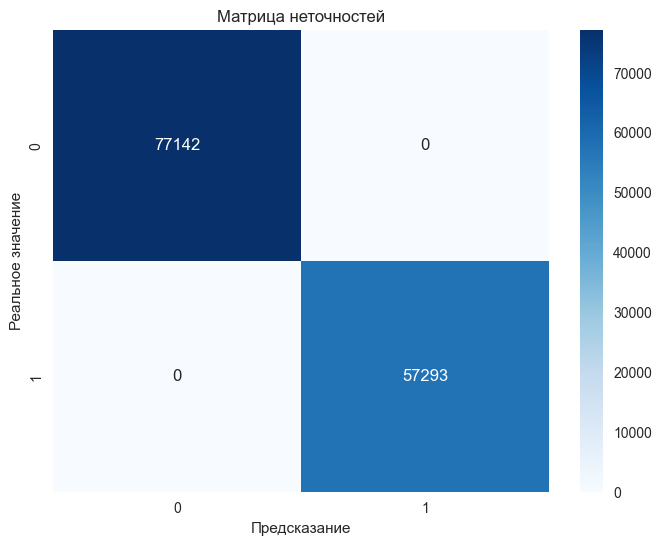

In [56]:
extr_classifier.fit(X_new, y)

y_pred = extr_classifier.predict(X_new)

print("Отчет по основным метрикам:")
print(classification_report(y, y_pred))

conf_matrix = confusion_matrix(y, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Матрица неточностей')
plt.xlabel('Предсказание')
plt.ylabel('Реальное значение')
plt.show()

Extra Trees Classifier показал безупречные результаты, правильно предсказав все значения

Рассмотрим модель логической регрессии для более наглядного отчета по метрикам

Отчет по основным метрикам:
              precision    recall  f1-score   support

           0       0.57      0.98      0.72     77142
           1       0.41      0.02      0.03     57293

    accuracy                           0.57    134435
   macro avg       0.49      0.50      0.38    134435
weighted avg       0.50      0.57      0.43    134435



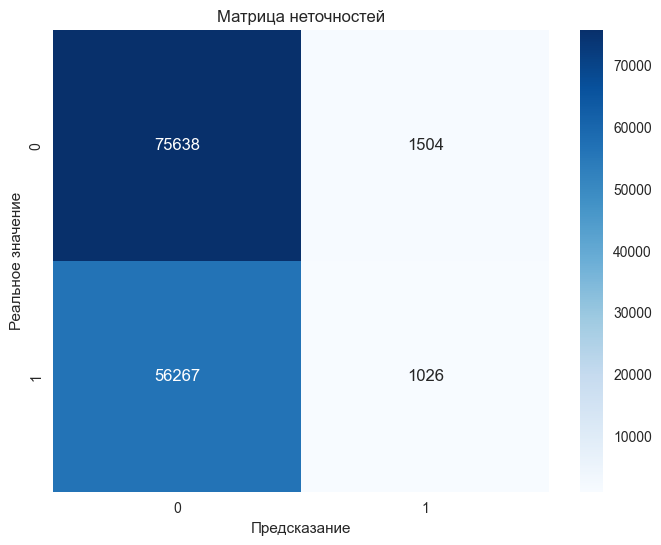

In [57]:
clf  = LogisticRegression()

clf.fit(X_new, y)

y_pred = clf.predict(X_new)

print("Отчет по основным метрикам:")
print(classification_report(y, y_pred))

conf_matrix = confusion_matrix(y, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Матрица неточностей')
plt.xlabel('Предсказание')
plt.ylabel('Реальное значение')
plt.show()

На датасете с обрезанными признаками, логическая регрессия показывает совсем плохие метрики (точность = 0.57), попробуес на полном датасете

Отчет по основным метрикам:
              precision    recall  f1-score   support

           0       0.67      0.97      0.79     77142
           1       0.89      0.35      0.50     57293

    accuracy                           0.70    134435
   macro avg       0.78      0.66      0.64    134435
weighted avg       0.76      0.70      0.67    134435



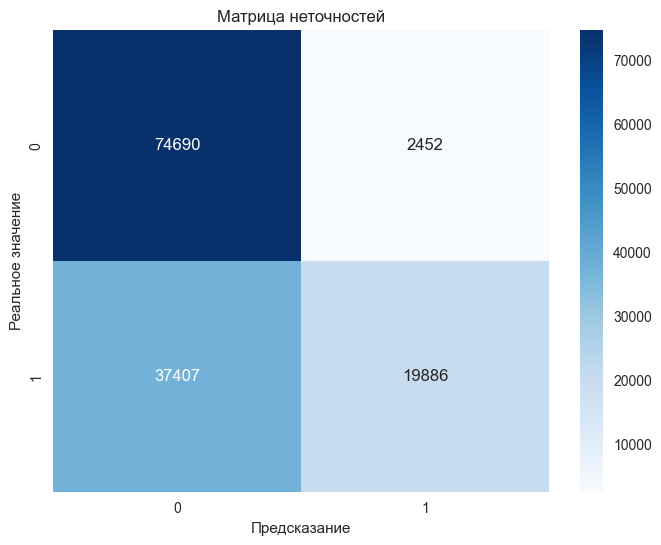

In [58]:
clf.fit(X, y)

y_pred = clf.predict(X)

print("Отчет по основным метрикам:")
print(classification_report(y, y_pred))

conf_matrix = confusion_matrix(y, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Матрица неточностей')
plt.xlabel('Предсказание')
plt.ylabel('Реальное значение')
plt.show()

Точность предсказания 0.70, все езе маловато маловато, но пойдет